In [1]:
import pandas as pd
import numpy as np
import random

In [6]:
# Define the number of entries
n = 500

# Define the list of tweet categories
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Create a data dictionary with random values
data = {
    'Date': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

In [7]:
# Step 3: Explore the data

# Print the first few rows
print("🔍 First 5 rows of the dataset:")
print(df.head())

🔍 First 5 rows of the dataset:
        Date Category  Likes
0 2023-01-01   Family   4160
1 2023-01-02   Travel   3443
2 2023-01-03   Travel   9144
3 2023-01-04    Music   1840
4 2023-01-05   Family   3835


In [8]:
# Print dataframe information
print("\n🧾 DataFrame Info:")
print(df.info())


🧾 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None


In [9]:
# Print statistical description
print("\n📊 Descriptive Statistics:")
print(df.describe())


📊 Descriptive Statistics:
                      Date        Likes
count                  500   500.000000
mean   2023-09-07 12:00:00  5268.284000
min    2023-01-01 00:00:00    18.000000
25%    2023-05-05 18:00:00  3054.750000
50%    2023-09-07 12:00:00  5085.500000
75%    2024-01-10 06:00:00  7653.250000
max    2024-05-14 00:00:00  9993.000000
std                    NaN  2735.573428


In [10]:
# Print count of each category
print("\n📈 Post Count by Category:")
print(df['Category'].value_counts())


📈 Post Count by Category:
Category
Food       76
Fashion    70
Music      64
Culture    64
Travel     60
Fitness    57
Health     56
Family     53
Name: count, dtype: int64


In [12]:
# Task 4 – Clean the Data

# Step 1: Remove null values
df = df.dropna()
# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 4: Convert 'Likes' column to integer (in case it's not already)
df['Likes'] = df['Likes'].astype(int)

# Step 5: Confirm cleanup
print("✅ Data cleaned successfully!")
print("\n🧾 Updated DataFrame Info:")
print(df.info())

✅ Data cleaned successfully!

🧾 Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None


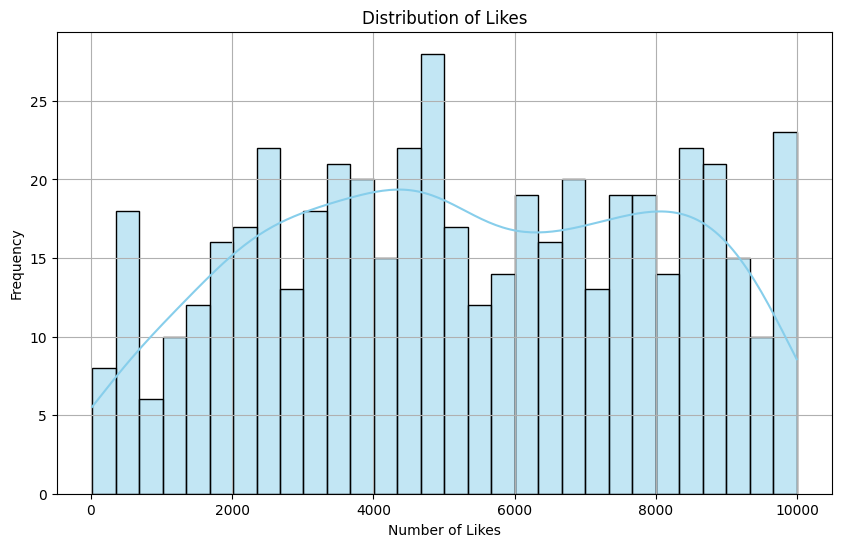

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Likes
plt.figure(figsize=(10, 6))
sns.histplot(df['Likes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

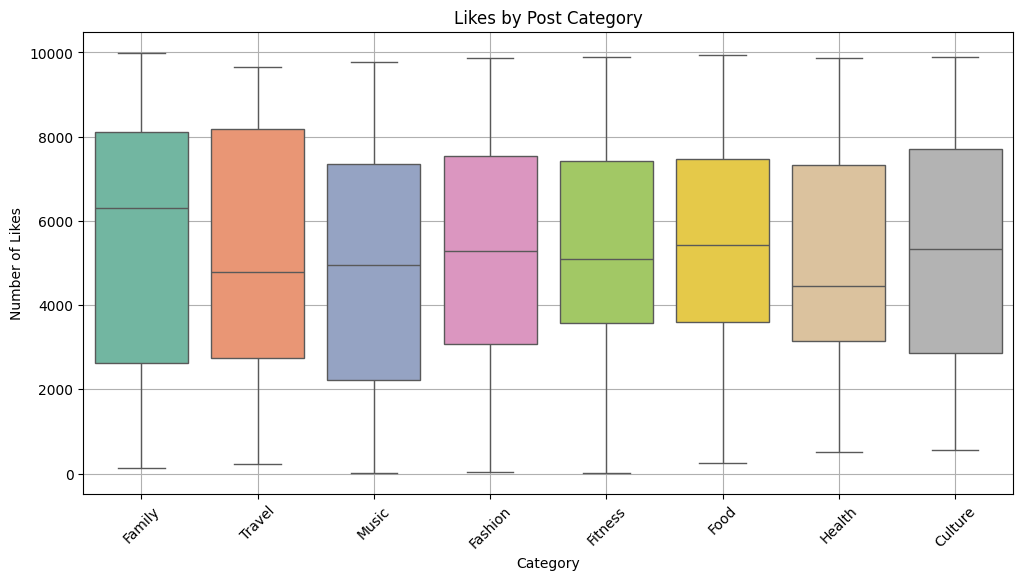

In [17]:
# Boxplot of Likes by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', hue='Category', y='Likes', data=df, palette='Set2', legend= False)
plt.title('Likes by Post Category')
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
# Overall average Likes
average_likes = df['Likes'].mean()
print(f"📌 Overall average Likes: {average_likes:.2f}")

# Average Likes per Category
category_mean_likes = df.groupby('Category')['Likes'].mean()
print("\n📊 Average Likes per Category:")
print(category_mean_likes)

📌 Overall average Likes: 5268.28

📊 Average Likes per Category:
Category
Culture    5339.328125
Family     5524.660377
Fashion    5298.528571
Fitness    5365.649123
Food       5513.881579
Health     5049.625000
Music      4921.375000
Travel     5101.283333
Name: Likes, dtype: float64
